<a href="https://colab.research.google.com/github/AysaTabrizi/TensorFlow_Certification/blob/master/Aysa_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
Boston = tf.keras.datasets.boston_housing

In [0]:
(x_train, y_train), (x_test, y_test) = Boston.load_data(test_split=0.2)

In [90]:
print("xtrain shape:", x_train.shape)
print("y_train shape", y_train.shape)
print("x_train sample:", x_train[0])

xtrain shape: (404, 13)
y_train shape (404,)
x_train sample: [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [0]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std


In [92]:
print("x_train sample:", x_train[0])

x_train sample: [-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1)
])

In [0]:
model.compile(optimizer='Adam', loss='MSE', metrics=['MAE'])

In [127]:
history = model.fit(x_train, y_train, validation_split=0.2 ,epochs=50)

Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

11/11 [==============================] - 0s 11ms/step - loss: 545.7162 - MAE: 21.4165 - val_loss: 570.3538 - val_MAE: 21.9998
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 459.7073 - MAE: 19.1991 - val_loss: 460.2079 - val_MAE: 19.3058
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 328.7987 - MAE: 15.5423 - val_loss: 281.3923 - val_MAE: 14.4064
Epoch 4/50
11/11 [==============================] - 0s 4ms/step - loss: 171.7318 - MAE: 10.9511 - v

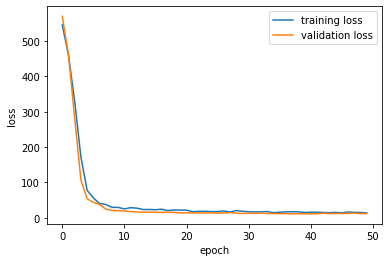

In [128]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

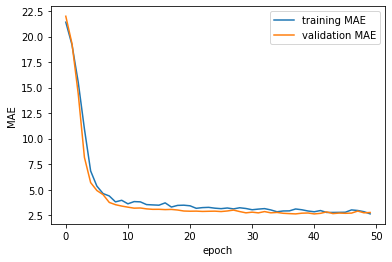

In [129]:
plt.plot(history.history['MAE'])
plt.plot(history.history['val_MAE'])
plt.legend(['training MAE', 'validation MAE'])
plt.xlabel('epoch')
plt.ylabel('MAE')
plt.show()

In [130]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 25.5808 - MAE: 3.4150


[25.580839157104492, 3.41501522064209]